# Pagerank

The Pagerank algorithm was invented by Page and Brin around 1998 and used in the prototype of Google’s search engine. The objective is to estimate the popularity, or the importance, of a webpage, based on the interconnection of the web. 

# Transition matrix 

The connections between pages is represented by a graph. A node represents a webpage and an arrow from page A to page B means that there is a link in page A to page B. We will denote by $L(p)$ the number of links in a page $p$.

**Example** There are four pages. Page A contains a link to page B, a link to page C, and a link to page D. Page B contains one single link to page D. Page C points to pages A and D, and page D points to pages A and C. They are represented by the following graph:

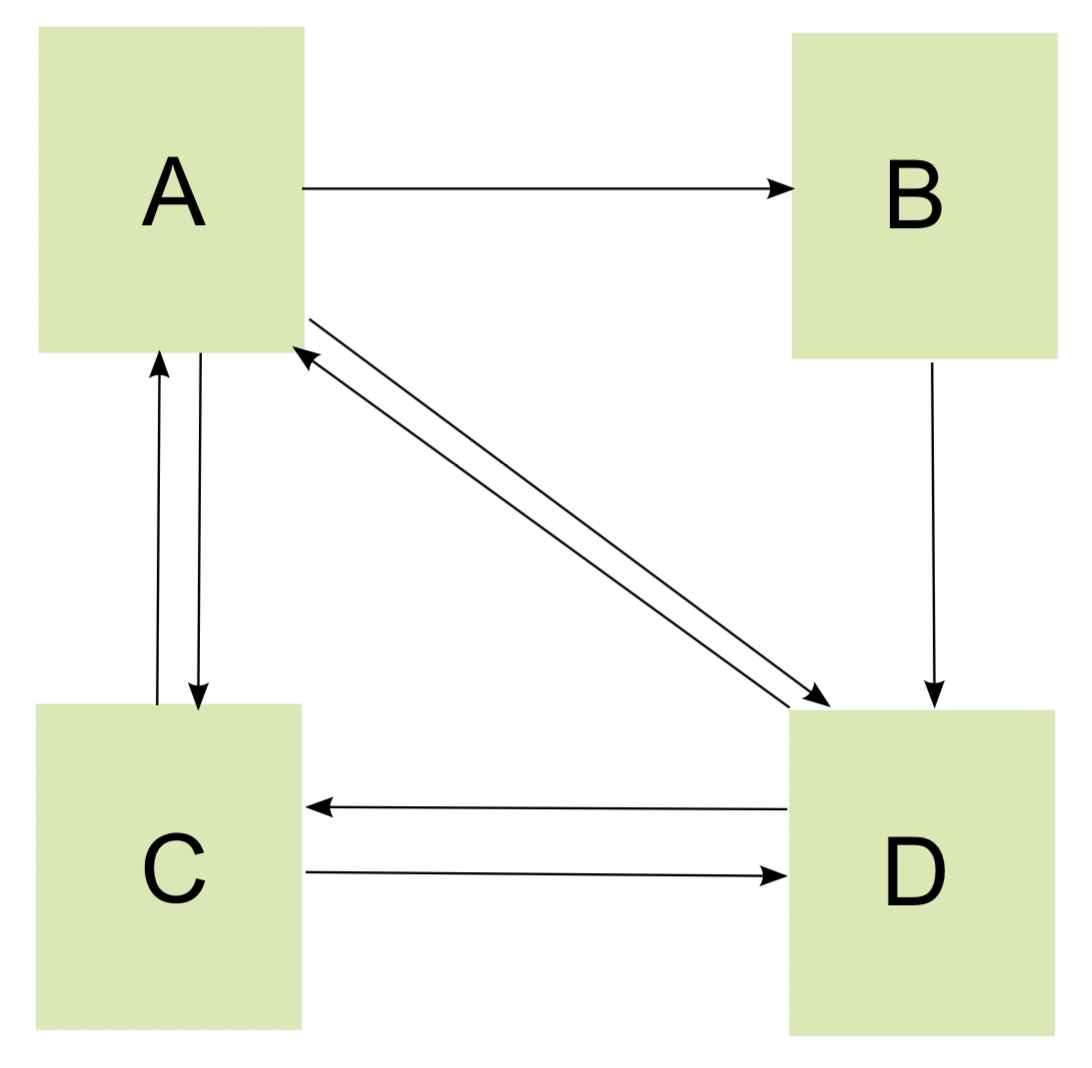

In [1]:
from IPython.display import Image, display
display(Image("pagerank1.png", width=200))

We have $L(A) = 3, L(B) = 1$ and $L(C) = L(D) = 2$.

Let $N$ be the total number of pages. We create an $N × N$ transition matrix $T$ by defining the $(i, j)$-entry as

$$
t_{ij} = 
\left\{
\begin{array}{cc} 
\frac{1}{L(j)} & \text{if there is a link from $j$ to $i$}\\
0 & \text{otherwise}
\end{array} 
\right.
$$

For our example, the matrix $T$ is:


In [2]:
import numpy as np 
T = np.array([
    [0, 0, 1/2.0, 1/2.0],
    [1/3.0, 0, 0, 0],    
    [1/3.0, 0, 0, 1/2.0],
    [1/3.0, 1, 1/2.0, 0]])

You should interpet $t_{ij}$ as the probability that you arrive at page $i$ by clicking at random one of the links in page $j$. 

# Pagerank vector 

We will also need the pagerank vector $p_0$, which is $N\times1$. You should  interpret $p_i$ as the chance of choosing page $i$ at random. 

If, in our example, 

In [3]:
p0 = (1/4.0)*np.ones((4,1))
p0

array([[ 0.25],
       [ 0.25],
       [ 0.25],
       [ 0.25]])

then we are equally likely to visit any of the pages A, B, C or D. 

# Simplified pagerank algorithm

Repeatedly replace $p$ by the product $Ap$ until it converges, i.e. generate the sequence $\{ p_k \}$, where 

$$ p_k = T^k p_0.$$

You should interpret $p_k$ in the following way. Suppose you choose a page at random according to the weights in the initial pagerank vector $p_0$. Then you choose one of the links in the chosen page at random according to the weights in the matrix $T$. Having gotten to a new page, you then choose another link at random in accordance with the probabilities in $T$. Then, after the $k$th click, the probabilities that you will be at each of the four possible pages will be the elements of the vector $p_k$. 

This is why we call the vector $p_k$ the pagerank vector: if we rank the pages using the corresponding components of $p_k$, then the top-ranked page will be the one we are most likely to arrive at by randomly following links, which is one measure of the importance or relevance of the page. 

In class we saw that repeatedly applying $T$ to a starting $p$ will pull out the dominant eigenvector, but that its magnitude will increase or decrease if the dominant eigenvalue is not 1. Yet, I've just argued that the sum of the elements of $p_k$ is always 1, so the $l_1$ norm is preserved at each step of the algorithm. 

### Question
Compute the eigenvalues of $T$. Can you explain why the length of $p_k$ does not diverge or go to zero?

### Solution 

From class, we know that the length of $p_k$ can be conserved at each iteration only if the modulus of the dominant eigenvalue is 1. So, is it? Let's check the modulus of the eigenvalues of $T$: 

In [4]:
from numpy import linalg as LA
print 'modulus of eigenvalues of T:'
print np.absolute(LA.eigvals(T))

modulus of eigenvalues of T:
[ 1.          0.40824829  0.40824829  0.5       ]


Yes, the largest eigenvalue in modulus is 1! 

This is actually a deep result. The Perron-Frobenius theorem states that for any column-stochastic matrix (one in which the column entries add to 1) with positive entries, we can always find 1 as an eigenvalue, and all other eigenvalues have magnitude strictly less than 1. Moreover, 1 is a simple eigenvalue in the sense that 1 is a root, but not a repeated root, of the characteristic polynomial.


In class, we showed that $p_k$ becomes a dominant eigenvector, i.e. its direction converges, but that its length is propoportional to $|\lambda_1|^k$. Since we now know that $|\lambda_1| = 1$, we may conclude that the length of $p_k$ also stabilizes for large $k$. Thus not only the direction, but also the length, of $p_k$ stabilizes, i.e. $p_k$ approaches a fixed vector $p$. If we take the limit as $k\rightarrow \infty$ of the basic iteration equation, 

$$p_k = Tp_{k-1}, $$

we get 

$$p = Tp, $$

i.e. $p$ is an eigenvector of $T$ with eigenvalue 1!

### Question 

Code up the pagerank algorithm, apply it to the example of 4 webpages, and rank them. 

### Solution

In [5]:
def pretty_print(my_column_vector): 
    pretty_string = ''
    for i in range(len(my_column_vector)): 
        pretty_string += '%.3f  ' % my_column_vector[i]
    print pretty_string

def page_rank(transition_matrix, number_iterations=20):
    number_of_pages = np.sqrt(transition_matrix.size)
    p = (1/number_of_pages)*np.ones((int(number_of_pages),1))
    for i in range(number_iterations):
        pretty_print(p) 
        p = np.dot(transition_matrix,p)
    return p

p = page_rank(T)

0.250  0.250  0.250  0.250  
0.250  0.083  0.208  0.458  
0.333  0.083  0.312  0.271  
0.292  0.111  0.247  0.351  
0.299  0.097  0.273  0.332  
0.302  0.100  0.265  0.333  
0.299  0.101  0.267  0.333  
0.300  0.100  0.266  0.334  
0.300  0.100  0.267  0.333  
0.300  0.100  0.266  0.334  
0.300  0.100  0.267  0.333  
0.300  0.100  0.267  0.333  
0.300  0.100  0.267  0.333  
0.300  0.100  0.267  0.333  
0.300  0.100  0.267  0.333  
0.300  0.100  0.267  0.333  
0.300  0.100  0.267  0.333  
0.300  0.100  0.267  0.333  
0.300  0.100  0.267  0.333  
0.300  0.100  0.267  0.333  


We can check that $p$ is converging to the solution of $Tp = p$: 

In [6]:
print 
print '|Tp - p|: ' 
print np.linalg.norm(np.dot(T,p) - p)


|Tp - p|: 
1.65160920494e-07


And we can check that $p$ has unit length, under the $l_1$ norm: 

In [7]:
print 'l1 norm of p =', np.linalg.norm(p, ord=1)

l1 norm of p = 1.0


### Conclusion 

Recall that the pagerank algorithm ranks the pages according to the corresponding elements of $p$. In our case, the fourth component of $p$ is largest, so page D has the highest rank. The interpretation is that a random surfer were randomly clicking links for an infinte time, then the page he would visit most frequently is D. 

This makes sense: Page D is the most important/relevant because it has the most incoming links (3; the others have 1 or 2).

| page | page rank |
|---|---|
| D | 0.333 | 
| A |0.300 | 
| C | 0.267 | 
| B | 0.100 |

# A problem with the simplified pagerank algorithm

Consider the following web graph consisting of eight web pages:

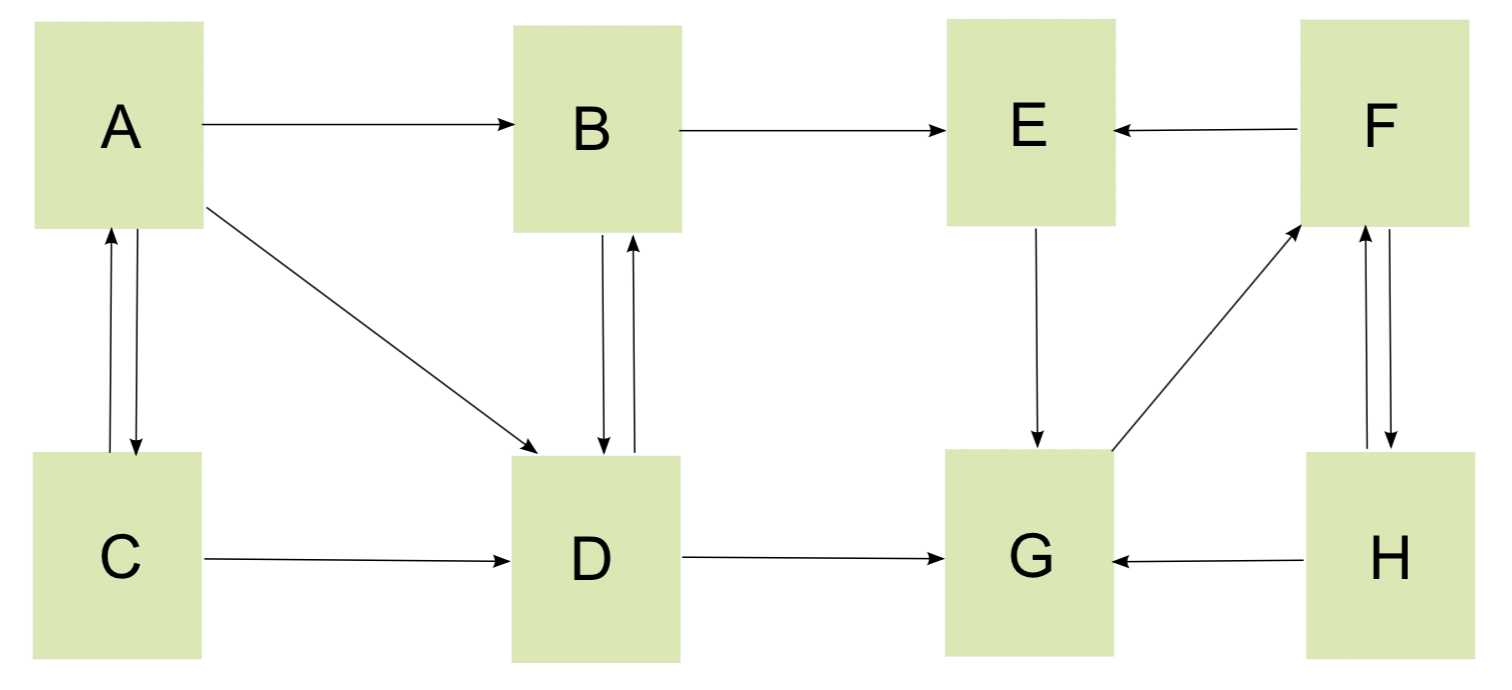

In [8]:
from IPython.display import Image, display
display(Image("pagerank2.png", width=500))

The transition matrix of this web graph is:

In [9]:
T = np.array([
    [0, 0, 1/2.0, 0, 0, 0, 0, 0],
    [1/3.0, 0, 0, 1/2.0, 0, 0, 0, 0],    
    [1/3.0, 0, 0, 0, 0, 0, 0, 0],
    [1/3.0, 1/2.0, 1/2.0, 0, 0, 0, 0, 0],
    [0, 1/2.0, 0, 0, 0, 1/2.0, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 1/2.0],
    [0, 0, 0, 1/2.0, 1, 0, 0, 1/2.0],
    [0, 0, 0, 0, 0, 1/2.0, 0, 0]])

### Question 

Use `page_rank` to compute the ranks of the eight web pages. 

### Solution 

In [10]:
_ = page_rank(T)

0.125  0.125  0.125  0.125  0.125  0.125  0.125  0.125  
0.062  0.104  0.042  0.167  0.125  0.188  0.250  0.062  
0.021  0.104  0.021  0.094  0.146  0.281  0.240  0.094  
0.010  0.054  0.007  0.069  0.193  0.286  0.240  0.141  
0.003  0.038  0.003  0.034  0.170  0.310  0.298  0.143  
0.002  0.018  0.001  0.022  0.174  0.369  0.259  0.155  
0.001  0.012  0.001  0.010  0.194  0.336  0.263  0.185  
0.000  0.005  0.000  0.006  0.174  0.355  0.291  0.168  
0.000  0.003  0.000  0.003  0.180  0.375  0.261  0.177  
0.000  0.001  0.000  0.002  0.189  0.350  0.270  0.188  
0.000  0.001  0.000  0.001  0.176  0.364  0.284  0.175  
0.000  0.000  0.000  0.000  0.182  0.371  0.263  0.182  
0.000  0.000  0.000  0.000  0.186  0.354  0.274  0.186  
0.000  0.000  0.000  0.000  0.177  0.366  0.279  0.177  
0.000  0.000  0.000  0.000  0.183  0.367  0.266  0.183  
0.000  0.000  0.000  0.000  0.184  0.358  0.275  0.184  
0.000  0.000  0.000  0.000  0.179  0.367  0.276  0.179  
0.000  0.000  0.000  0.000  0.1

Notice that the first four components of the page-rank vector converge to zero. This means that, over an infinite number of clicks, the random surfer hardly ever visits pages A, B, C and D. This is because once a surfer arrives at pages E, F, G, or H, he/she gets stuck in these four pages.



The simplified pagerank algorithm therefore ranks the pages as follows: 

| page | page rank |
|---|---|
| F | 0.366 | 
| G | 0.274 | 
| E | 0.180 | 
| H | 0.180 | 
| A | 0.000 | 
| B | 0.000 | 
| C | 0.000 | 
| D | 0.000 | 

According to pagerank, page D is the least important. But it turns out that page D has the greatest number of links pointing to it:  

| page | number links pointing to page |
|---|---|
| D | 3 | 
| G | 3 | 
| F | 2 | 
| A | 1 | 
| B | 1 | 
| C | 1 | 
| E | 1 | 
| H | 1 | 





We need to modify the simplified page-rank algorithm so that the random surfer can escape from pages E, F, G and H. We do this by assuming that after a period of time spent following links, the random surfer get's bored and moves to a page chosen at random from all 8 pages. One way to model this is to modify the transition matrix as follows: 

```
    d = 0.85 # fraction of time that surfer clicks on random page instead of a link
    T_modified = d*T + (1-d)*np.ones(T.shape)/len(T)
```

### Question

Re-write `page_rank`, this time using `T_modified` instead of `T` in the update scheme. Run your new `page_rank` for `d = 0.85, 0`. What do you notice? 

### Solution 

In [12]:
def page_rank_modified(transition_matrix, number_iterations=20, d=0.85):
    transition_matrix = d*transition_matrix + (1-d)*np.ones(transition_matrix.shape)/len(transition_matrix)
    number_of_pages = np.sqrt(transition_matrix.size)
    p = (1/number_of_pages)*np.ones((int(number_of_pages),1))
    for i in range(number_iterations):
        pretty_print(p) 
        p = np.dot(transition_matrix,p)
    return p

_ = page_rank_modified(T)

0.125  0.125  0.125  0.125  0.125  0.125  0.125  0.125  
0.072  0.107  0.054  0.160  0.125  0.178  0.231  0.072  
0.042  0.107  0.039  0.108  0.140  0.246  0.224  0.094  
0.035  0.076  0.031  0.093  0.169  0.249  0.224  0.123  
0.032  0.068  0.029  0.074  0.157  0.261  0.254  0.125  
0.031  0.059  0.028  0.069  0.159  0.288  0.237  0.130  
0.031  0.057  0.028  0.065  0.166  0.275  0.238  0.141  
0.030  0.055  0.027  0.063  0.160  0.281  0.247  0.136  
0.030  0.054  0.027  0.062  0.162  0.287  0.239  0.138  
0.030  0.054  0.027  0.062  0.164  0.281  0.241  0.141  
0.030  0.054  0.027  0.062  0.161  0.284  0.244  0.138  
0.030  0.054  0.027  0.062  0.162  0.285  0.241  0.139  
0.030  0.054  0.027  0.062  0.163  0.282  0.242  0.140  
0.030  0.054  0.027  0.062  0.162  0.284  0.243  0.139  
0.030  0.054  0.027  0.062  0.162  0.284  0.241  0.139  
0.030  0.054  0.027  0.062  0.162  0.283  0.242  0.139  
0.030  0.054  0.027  0.062  0.162  0.284  0.242  0.139  
0.030  0.054  0.027  0.062  0.1

We see that the page ranks of pages A to D no longer vanish, i.e. they are assigned some importance by page rank. This is good! 

In [14]:
_ = page_rank_modified(T, d=0)

0.125  0.125  0.125  0.125  0.125  0.125  0.125  0.125  
0.125  0.125  0.125  0.125  0.125  0.125  0.125  0.125  
0.125  0.125  0.125  0.125  0.125  0.125  0.125  0.125  
0.125  0.125  0.125  0.125  0.125  0.125  0.125  0.125  
0.125  0.125  0.125  0.125  0.125  0.125  0.125  0.125  
0.125  0.125  0.125  0.125  0.125  0.125  0.125  0.125  
0.125  0.125  0.125  0.125  0.125  0.125  0.125  0.125  
0.125  0.125  0.125  0.125  0.125  0.125  0.125  0.125  
0.125  0.125  0.125  0.125  0.125  0.125  0.125  0.125  
0.125  0.125  0.125  0.125  0.125  0.125  0.125  0.125  
0.125  0.125  0.125  0.125  0.125  0.125  0.125  0.125  
0.125  0.125  0.125  0.125  0.125  0.125  0.125  0.125  
0.125  0.125  0.125  0.125  0.125  0.125  0.125  0.125  
0.125  0.125  0.125  0.125  0.125  0.125  0.125  0.125  
0.125  0.125  0.125  0.125  0.125  0.125  0.125  0.125  
0.125  0.125  0.125  0.125  0.125  0.125  0.125  0.125  
0.125  0.125  0.125  0.125  0.125  0.125  0.125  0.125  
0.125  0.125  0.125  0.125  0.1

All pages becomes equally important. In this extreme cases, the surfer is always choosing pages uniformly at random, and never following links. 